EE 240 HW1

# Installs

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model

# **H 1.1**

## H 1.1 prep

In [2]:
# storing variables
collection_size = 1000
coin_flips = 10
experiments = 100000
heads = 1
tails = 0

results = np.empty((collection_size, coin_flips), dtype=int)
for coin in range(collection_size):
  results[coin] = np.random.choice([heads, tails], size = coin_flips)

In [3]:
# testing coin 0, coin random, and coin min
c_1 = results[0]
print(f"index : {0}")
print(c_1)
c_rand_idx = np.random.randint(0, collection_size)
c_rand = results[c_rand_idx]
print(f"index : {c_rand_idx}")
print(c_rand)
coin_sum = np.sum(results, axis=1)
c_min_idx = np.argmin(coin_sum)
c_min = results[c_min_idx]
print(f"index : {c_min_idx}")
print(c_min)

index : 0
[0 1 0 0 1 0 0 1 1 1]
index : 412
[0 1 1 1 0 0 0 0 0 0]
index : 67
[0 1 0 0 0 0 0 0 0 0]


In [4]:
v_1 = np.zeros(experiments)
v_rand = np.zeros(experiments)
v_min = np.zeros(experiments)

# repeat fliping experiment 100000 times
for experiment in range(experiments):
  # randomly choose 0 (tails) or 1 (heads) for 1000 (collection_size) coins, 10 (coin-flips) times
  results = np.random.choice([heads, tails], size=(collection_size, coin_flips))

  # calculate the fraction of heads for c_1, c_rand, and c_min
  v_1[experiment] = np.mean(results[0])
  c_rand_idx = np.random.randint(0, collection_size) # chooses new idx each experiment
  v_min_idx = np.argmin(np.sum(results, axis=1)) # sums coin flips and finds min
  v_rand[experiment] = np.mean(results[c_rand_idx])
  v_min[experiment] = np.mean(results[v_min_idx])

## **H 1.1 (a)**

μ is always 0.5 for any coin because the probability does not change for a coin.

## **H 1.1 (b)**

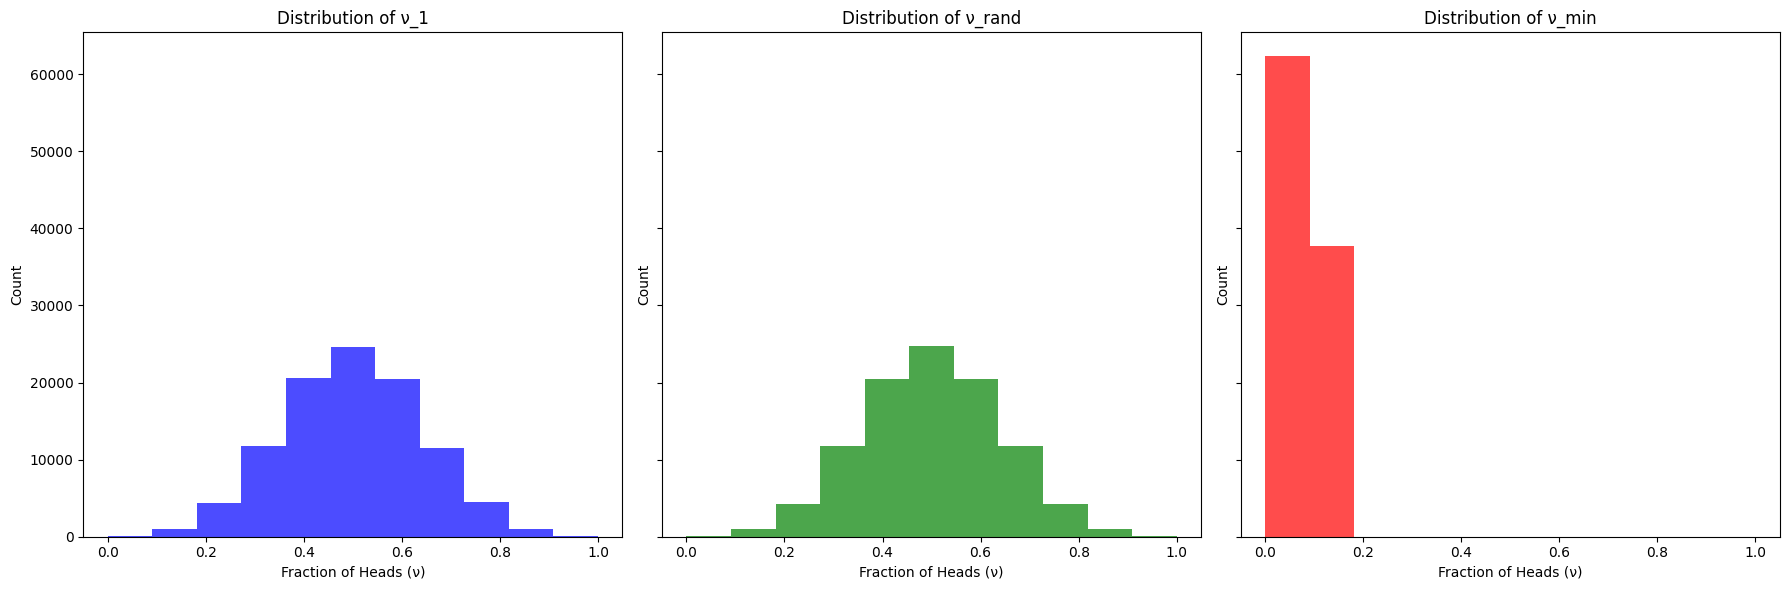

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
axs[0].hist(v_1, bins=11, range=(0,1), color='blue', alpha=0.7)
axs[0].set_title('Distribution of ν_1')
axs[1].hist(v_rand, bins=11, range=(0,1), color='green', alpha=0.7)
axs[1].set_title('Distribution of ν_rand')
axs[2].hist(v_min, bins=11, range=(0,1), color='red', alpha=0.7)
axs[2].set_title('Distribution of ν_min')

for ax in axs:
    ax.set_xlabel('Fraction of Heads (ν)')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## **H 1.1 (c)**

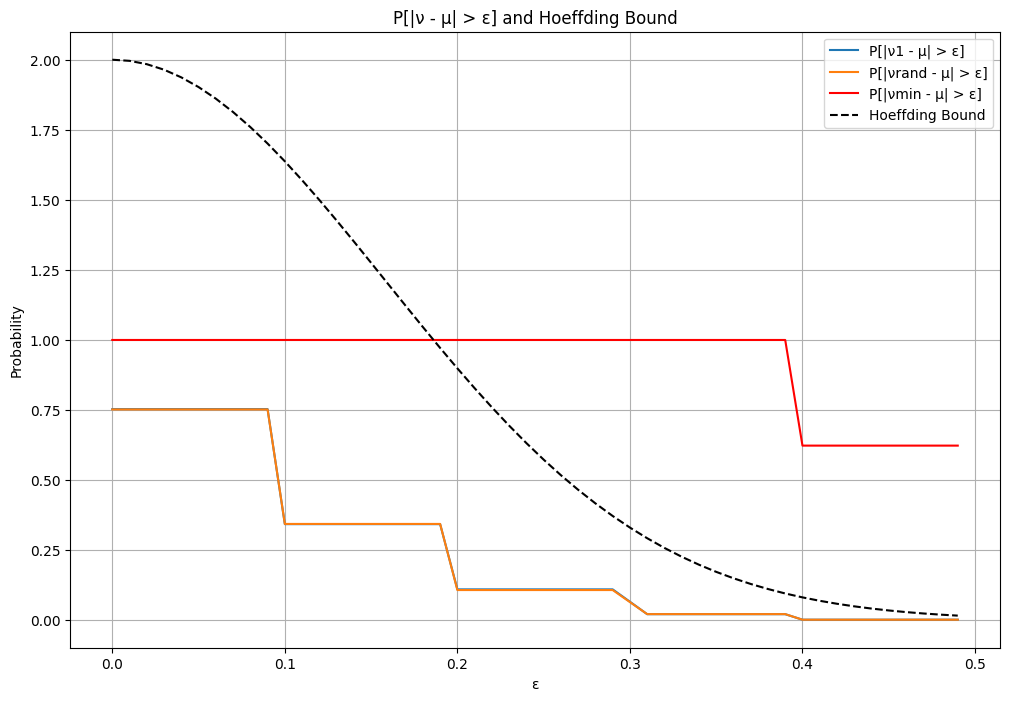

In [6]:
epsilons = np.arange(0, 0.5, 0.01)

# function to calculate empirical probabilities
def empirical_prob(v, mu=0.5):
    return np.mean(np.abs(v - mu) > epsilons[:, np.newaxis], axis=1)

prob_v_1 = empirical_prob(v_1)
prob_v_rand = empirical_prob(v_rand)
prob_v_min = empirical_prob(v_min)

hf_bound = 2 * np.exp(-2 * epsilons**2 * coin_flips)

plt.figure(figsize=(12, 8))
plt.plot(epsilons, prob_v_1, label='P[|ν1 - μ| > ε]')
plt.plot(epsilons, prob_v_rand, label='P[|νrand - μ| > ε]')
plt.plot(epsilons, prob_v_min, label='P[|νmin - μ| > ε]', color='red')
plt.plot(epsilons, hf_bound, label='Hoeffding Bound', linestyle='--', color='black')

plt.xlabel('ε')
plt.ylabel('Probability')
plt.title('P[|ν - μ| > ε] and Hoeffding Bound')
plt.legend()
plt.grid(True)
plt.show()

## **H 1.1 (d)**



c_min does not obey hoeffding bound while c_1 and c_rand do.



*   c_1 and c_rand both obey hoeffding bounds because it applies to any single coin flipped N times, where each flip is independent and identically distributed. Since c_1 and c_rand are both single coins with these conditions their behavior should not deviate from what Hoeffinffding's Inequalitiy predicts over many repetitions of the experiment.
*   c_min does not obet Hoeffing bounds in the same way because c_min is seloected after the experiment based on it's outcome.

# **H 1.2**

## **H 1.2 (a)**

In [7]:
# storing variables
n_sims = 100000
p_bin = [0.4, 0.6]

a_bin_red_p, a_bin_blue_p = 0.3, 0.7
b_bin_blue_p, b_bin_red_p = 0.7, 0.3
a_bin_p = [a_bin_red_p, a_bin_blue_p]
b_bin_p = [b_bin_blue_p, b_bin_red_p]

count = 0
a_count = 0
# randomly select bins 100000 (n_sims) times
for i in range(n_sims):
  selected_bin = np.random.choice(['A', 'B'], p=p_bin)

  # use probability of each bin to randomly select ball (a_bin_p, b_bin_p)
  if selected_bin == 'A':
    balls = np.random.choice(['red', 'blue'], size=2, p=a_bin_p)
  else:
    balls = np.random.choice(['red', 'blue'], size=2, p=b_bin_p)

  # count outcome
  if 'red' in balls and 'blue' in balls:
    count += 1
    if selected_bin == 'A':
      a_count += 1

a_prob = a_count / count * 100
print("Probability: {:.8f}%".format(a_prob))

Probability: 39.76280994%


The estimated probability is 40% because both scenarios probability is equal, the probability that this occurs is the same as the probability of the bin being chosen.

## **H 1.2 (b)**

In [8]:
# storing variables for each ball in bin
a_bin_red_p, a_bin_blue_p, a_bin_white_p, a_bin_black_p = 0.1, 0.3, 0.2, 0.4
b_bin_red_p, b_bin_blue_p, b_bin_white_p, b_bin_black_p = 0.4, 0.2, 0.3, 0.1
a_bin_p = [a_bin_red_p, a_bin_blue_p, a_bin_white_p, a_bin_black_p]
b_bin_p = [b_bin_red_p, b_bin_blue_p, b_bin_white_p, b_bin_black_p]

count = 0
a_count = 0
# randomly select bins 100000 (n_sims) times
for i in range(n_sims):
  selected_bin = np.random.choice(['A', 'B'], p=p_bin)

  # use probability of each bin to randomly select ball (a_bin_p, b_bin_p)
  if selected_bin == 'A':
    balls = np.random.choice(['red', 'blue', 'white', 'black'], size=2, p=a_bin_p)
  else:
    balls = np.random.choice(['red', 'blue', 'white', 'black'], size=2, p=b_bin_p)

  # count outcome
  if 'red' in balls and 'blue' in balls:
    count += 1
    if selected_bin == 'A':
      a_count += 1

a_prob = a_count / count * 100
print("Probability: {:.8f}%".format(a_prob))

Probability: 19.92537313%


There is a higher likelihood of the outcome being bin b because there is a higher combined probability of red and blue balls compared to the a bin probabilities of red and blue. b bin also has a higher likelihood of being chosen as well which puts the a bin probability around 20%.

# **H 1.3**

<ol type = "1">
<li>$N = (x_1, y_1),...,(x_N, y_N) $ : Training samples described by N</li>
<li>$y_n \in \{+1, -1\}$ : Classes of -1 and +1</li>
<li>$\mu_+ = \frac{1}{N_+} ∑\limits_{i:y_i = +1} x_i$: mean vector of all n with class of +1</li>
<li>$\mu_- = \frac{1}{N_-} ∑\limits_{i:y_i = -1} x_i$: mean vector of all n with class of -1</li>
<li>$g(x) = \sin(w^Tx + b)$: Decision function</li>
<li>$w = 2(μ_+-μ_-)$: weight vector</li>
<li>$b = \|μ_-\|^2_2 - \|μ_+\|^2_2$: bias term</li>
<li>$α_n$ : describes the contribution of each n by class</li>
<li>$⟨x_n, x⟩$: similarity of $x_n$ and $x$, the test sample</li>
<li>$w^Tx+b ≡ ∑^N_{n=1} α_n ⟨x_n,x\rangle + b$</li>
</ol>

To prove that $w^Tx+b$, the decision function, is equivalent to $∑^N_{n=1} α_n ⟨x_n,x\rangle + b$ and find $\alpha_n$, we need to describe $w$ in terms of vectors for each class.
Because $w$ describes the weight vector where $ (y_n = +1) ⇒ x_n$ contributes to $μ_+$ and $ (y_n = -1) ⇒ x_n$ contributes to $μ_-$, we can replace $\mu_+$ and $\mu_-$ with the mean vector of all samples in each class (3 and 4). We then identify $\alpha_n$ which represent the weight applied to each vector $X_n$ that influences the decision boundary. This can then replace $w$ in the original function which results to $(∑^N_{n=1} α_n x_n)^Tx$ and simplifies to $∑^N_{n=1} α_n ⟨x_n,x ⟩$.

Reference: https://idc9.github.io/stor390/notes/classification/classification.html

In [9]:
%%html
<iframe src="https://drive.google.com/file/d/1lTw_Wf8v4rqSXrfybW4NpFZKCOyiHXSf/preview" width="640" height="480" allow="autoplay"></iframe>

Reference: https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive/50672083#50672083


# **H 1.4**

In [10]:
# data preprocessing
mnist = fetch_openml('mnist_784', parser = 'auto')
mnist.target = mnist.target.astype(int)

mask = np.isin(mnist.target, [2, 6, 8])
X_filtered = mnist.data[mask]
y_filtered = mnist.target[mask]

X_filtered = np.array(X_filtered, dtype=float)

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, train_size=600, stratify=y_filtered, random_state=62
)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## **H 1.4 (a)**

In [11]:
# euclidean distance calculated by vectors
def euclidean_distance(X, x):
  return np.linalg.norm(X - x, axis=1)

# computes model accuracy and stores outcome data for analysis in part b
def compute_accuracy(distance_df):
  distance_df['actual_label'] = y_test
  distance_df['hit'] = distance_df['predicted_label'] == distance_df['actual_label']
  correct_predictions = distance_df['hit'].sum()
  total_predictions = len(distance_df)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

# class to predict labels
class KNNClassifier:
  def __init__(self, k):
    self.k = k
    self.features = None
    self.labels = None

  def fit(self, X_train, y_train):
    self.features = np.array(X_train)
    self.labels = np.array(y_train)

  def predict(self, X_test):
    X_test = np.array(X_test)
    predictions = []
    distance_info = []
    # iterate over each test vector and calculate distance / neighbor
    for index, x in enumerate(X_test):
      distances = euclidean_distance(self.features, x)
      nearest_indices = np.argsort(distances)[:self.k]
      nearest_labels = self.labels[nearest_indices]
      most_common = np.bincount(nearest_labels).argmax()
      predictions.append(most_common)

      # store the nearest distance and prediction
      distance_info.append({
        'index': index,
        'nearest_distance': distances[nearest_indices[0]],
        'predicted_label': most_common
      })

    return predictions, distance_info

In [12]:
# 1nn classifier training
knn_classifier_k1 = KNNClassifier(k=1)
knn_classifier_k1.fit(X_train, y_train)
predictions, distance_info = knn_classifier_k1.predict(X_test)
distance_df = pd.DataFrame(distance_info) # create df from distance info
distance_df['actual_label'] = y_test
accuracy = compute_accuracy(distance_df)
print("Accuracy: {:.8f}%".format(accuracy))

Accuracy: 96.67512817%


In [13]:
# storing variables created from df for part b
shortest_true_samples = distance_df[distance_df['hit'] == True].sort_values(by='nearest_distance', kind='quicksort').head(5)
furthest_false_samples = distance_df[distance_df['hit'] == False].sort_values(by='nearest_distance', ascending=False, kind='quicksort').head(5)

In [14]:
# 3nn classifier training
knn_classifier_k3 = KNNClassifier(k=3)
knn_classifier_k3.fit(X_train, y_train)
predictions, distance_info = knn_classifier_k3.predict(X_test)
distance_df = pd.DataFrame(distance_info)
distance_df['actual_label'] = y_test
accuracy = compute_accuracy(distance_df)
print("Accuracy: {:.8f}%".format(accuracy))

Accuracy: 96.87919964%


The empirical accuracy of the models with k=1 and k=3 are similar, however the k=3 model seems to be slightly more accurate with 96.8792% while the k=1 model is 96.6751% accurate.

## **H 1.4 (b)**

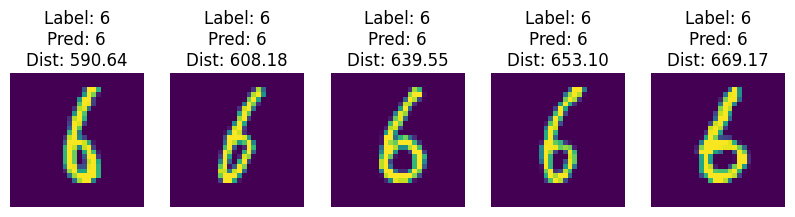

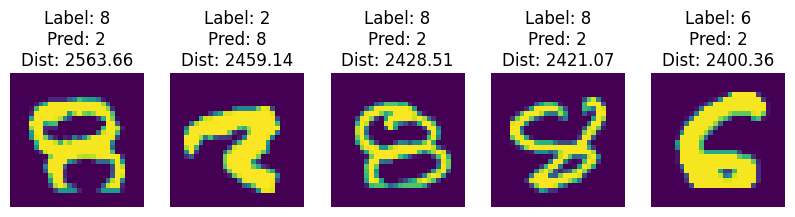

In [15]:
'''
https://github.com/MrDataScience/tutorials/blob/master/Data/MNIST/How%20To%20Plot%20MNIST%20Digits%20Using%20Matplotlib.ipynb
was used for reference in plotting samples
'''
def plot_samples(indices, predictions, actuals, distances, dataset):
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(dataset[idx].reshape(28, 28)) # features need to be reshaped from vectors
        plt.title(f"Label: {actuals.iloc[idx]}\nPred: {predictions.iloc[idx]}\nDist: {distances.iloc[idx]:.2f}")
        plt.axis('off')
    plt.show()

plot_samples(shortest_true_samples.index, distance_df['predicted_label'], distance_df['actual_label'], distance_df['nearest_distance'], X_test)
plot_samples(furthest_false_samples.index, distance_df['predicted_label'], distance_df['actual_label'], distance_df['nearest_distance'], X_test)

The 5 samples I chose from correct and incorrectly predicted models was based on the distance to the nearest neighbor to show the extreme differences in samples. A pattern that can be seen in these results is that 6 is reletively similar in terms of distance while 8 is more complicated and seem to be further away from the nearest point. An explanation for these results could be that many people write 6's in a similar fashion while there are different ways of writing and 8.

# **H 1.5**

## **H 1.5 (a)**

In [16]:
# Load CSV and columns
housing_df = pd.read_csv("Housing.csv")

In [17]:
y = housing_df['price'].values
X = housing_df['lotsize'].values
X = (X - np.mean(X)) / np.std(X) # normalize x
df_size = housing_df.shape
print(df_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=250, shuffle=False
)

(546, 13)


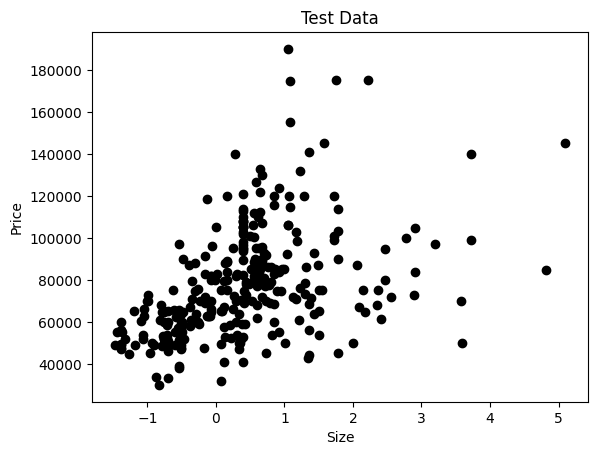

In [18]:
# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [19]:
'''
references for scratch code. based structure off previous project
https://medium.com/international-school-of-ai-data-science/gradient-descent-multi-linear-regression-ml-from-scratch-3-8773421be2ce
https://github.com/akaihartley/CS_235/blob/main/ahart033_scratch.ipynb
'''

class Lregression:
  def __init__(self, a=0.01, max_iter=1000, tol=1e-5):
    self.a = a # learning rate
    self.max_iter = max_iter # max iterations for stopping criteria
    self.tol = tol # tolerance for stopping criteria
    self.w = None
    self.b = None

  def fit(self, X, y):
    if X.ndim == 1:
      X = X.reshape(-1, 1)

    n, m = X.shape
    self.w = np.zeros(m)
    self.b = 0

    for i in range(self.max_iter):
      # y = w * X + b
      y_pred = self.predict(X)

      self.gradient_descent(n, X, y_pred, y)

      # check stopping criteria
      cost = self.compute_cost(y_pred, y)
      if cost < self.tol:
        break

  def predict(self, X):
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    return np.dot(X, self.w) + self.b

  def gradient_descent(self, n, X, y_pred, y):
    self._dw = -(1 / n) * np.dot(X.T, (y-y_pred))
    self._db = -(1 / n) * np.sum(y - y_pred)

    self.w -= self.a * self._dw
    self.b -= self.a *self._db

  def compute_cost(self, y_pred, y_train):
    return (1 / (2 * len(y_train))) * np.sum((y_pred - y_train) ** 2)

In [20]:
LR_model = Lregression()
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)

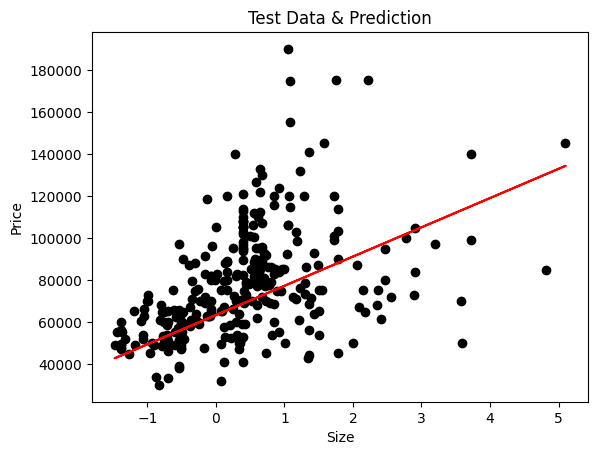

In [21]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='red', label='Prediction')
plt.title('Test Data & Prediction')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

## **H 1.5 (b)**

In [22]:
X = housing_df[['lotsize', 'bedrooms', 'bathrms']].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # normalize x
df_size = housing_df.shape
print(df_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=250, shuffle=False
)

(546, 13)


In [23]:
LR_model_2 = Lregression()
LR_model_2.fit(X_train, y_train)
predictions = LR_model_2.predict(X_test)

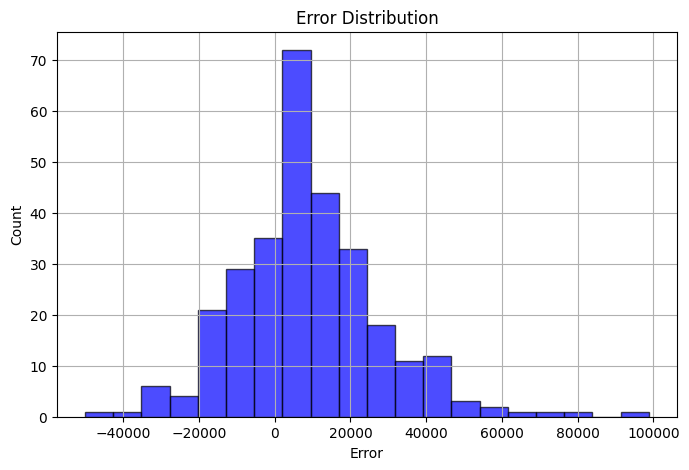

In [31]:
'''
discusses methods for linear regression model analysis
https://juanitorduz.github.io/lm_viz/
'''
residuals = y_test - predictions
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error Distribution')
plt.grid(True)
plt.show()

# space added so chart will display in pdf

